In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## EDA Age Rating

#### Goals

- Get descriptive statistics for age ratings for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Netflix
#### i. Import data

In [2]:
netflix = pd.read_pickle("../Data/netflix_final_clean.pkl")

In [3]:
netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller"
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror"
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama"
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy


In [4]:
netflix["age"].isna().sum()

529

In [5]:
1 - (netflix["age"].isna().sum() / len(netflix))

0.6768478924862553

**NOTE : We have 634 null values for the ratings column, meaning that we are using just 67% of the values for this analysis.**

In [6]:
netflix = netflix[~netflix["age"].isna()]

#### ii. Descriptive statistics

In [7]:
netflix["age"].describe()

count    1108.000000
mean       12.472022
std         6.318563
min         0.000000
25%         7.000000
50%        16.000000
75%        18.000000
max        18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- One quarter of the tv shows are for 7 years or younger.
- One quarter of the tv shows are for 18 years or older.
- Half the tv shows are for 16 years or older.


#### iii. Plotting

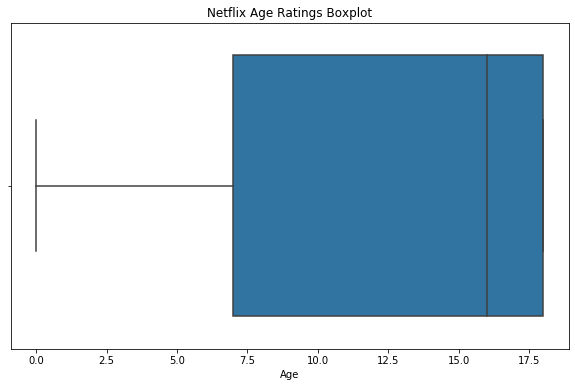

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["age"])
ax.set_title("Netflix Age Ratings Boxplot")
ax.set_xlabel("Age");

From the box plot we can clearly see how most of the tv shows are distributed from 7 years or older to 16 years or older. Just 25% of the tv shows are for 18 or older.

We will create a new column specifying the audience:

- 0-12 years: Children
- 13-16 years: Teen
- 18 years: Adult

In [9]:
netflix["audience"] = np.where(netflix["age"] <= 12, "Children", np.where(netflix["age"] < 18, "Teen", "Adult"))

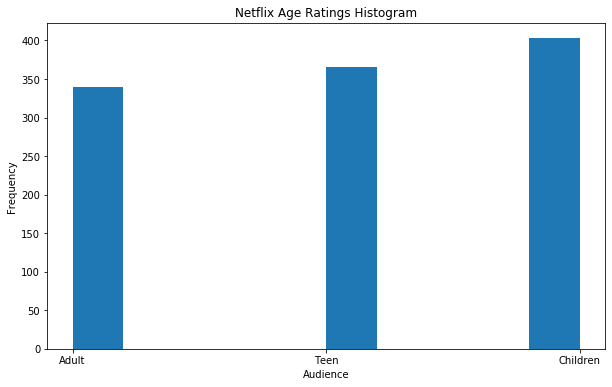

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(netflix["audience"])
ax.set_title("Netflix Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

From the histogram above, we can see a almost equal disribution for all audiences, having children as most frequent, afterwards Teen and lastly Adult.

-----

### 2. Amazon
#### i. Import data

In [11]:
amazon = pd.read_pickle("../Data/amazon_final_clean.pkl")

In [12]:
amazon.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Wire,2002,18.0,9.3,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
1,The Sopranos,1999,18.0,9.2,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
2,Band of Brothers,2001,18.0,9.4,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"
3,Vikings,2013,18.0,8.6,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
4,Mr. Robot,2015,18.0,8.5,tt4158110,tvSeries,Mr. Robot,Mr. Robot,2015.0,2015.0,49.0,"Crime,Drama,Thriller"


In [13]:
amazon["age"].isna().sum()

610

In [14]:
1 - (amazon["age"].isna().sum() / len(amazon))

0.5271317829457365

**NOTE : We have 846 null values for the ratings column, meaning that we are using just 52% of the values for this analysis.**

In [15]:
amazon = amazon[~amazon["age"].isna()]

#### ii. Descriptive statistics

In [16]:
amazon["age"].describe()

count    680.000000
mean      10.605882
std        6.949044
min        0.000000
25%        7.000000
50%       16.000000
75%       16.000000
max       18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- One quarter of the tv shows are for 7 years or younger.
- The median is of 16 years or older, meaning that at least 50% of the tv shows are for 16 years or older.

#### iii. Plotting

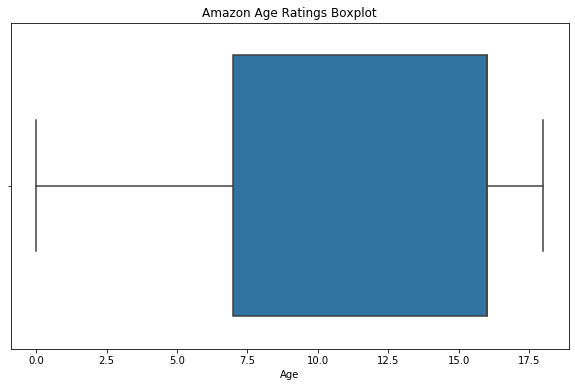

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["age"])
ax.set_title("Amazon Age Ratings Boxplot")
ax.set_xlabel("Age");

From the box plot we can clearly see how most of the tv shows are distributed from 7 years or older to 16 years or older. Less than 25% of the tv shows are for 18 or older.

We will create an audience column, as explained on Netflix.

In [18]:
amazon["audience"] = np.where(amazon["age"] <= 12, "Children", np.where(amazon["age"] < 18, "Teen", "Adult"))

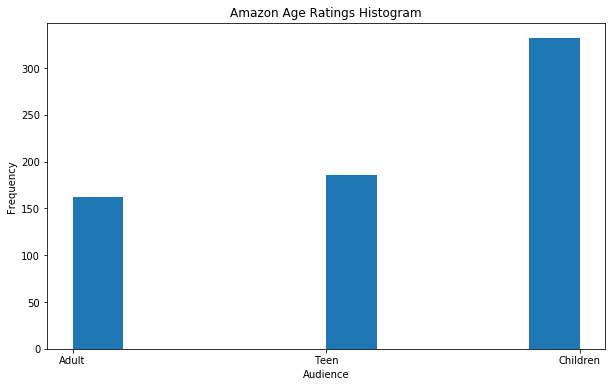

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(amazon["audience"])
ax.set_title("Amazon Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

The histogram above shows amazon seems to have more tv shows for Children than for teen and adult. Teen and Adult seem to have almost the same distribution.

-----

### 3. HBO
#### i. Import data

In [20]:
hbo = pd.read_pickle("../Data/hbo_final_clean.pkl")

In [21]:
hbo.head()

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Game of Thrones,2011,18.0,9.3,tt0944947,tt0944947,tvSeries,Game of Thrones,Game of Thrones,2011.0,2011.0,57.0,"Action,Adventure,Drama"
1,The Wire,2002,18.0,9.3,tt0306414,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
2,Chernobyl,2019,18.0,9.4,tt7366338,tt7366338,tvMiniSeries,Chernobyl,Chernobyl,2019.0,2019.0,330.0,"Drama,History,Thriller"
3,The Sopranos,1999,18.0,9.2,tt0141842,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
4,Band of Brothers,2001,18.0,9.4,tt0185906,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"


In [22]:
hbo["age"].isna().sum()

30

In [23]:
1 - (hbo["age"].isna().sum() / len(hbo))

0.8255813953488372

**NOTE : We have 33 null values for the ratings column, meaning that we are using just 82% of the values for this analysis.**

In [24]:
hbo = hbo[~hbo["age"].isna()]

#### ii. Descriptive statistics

In [25]:
hbo["age"].describe()

count    142.000000
mean      16.225352
std        4.577767
min        0.000000
25%       18.000000
50%       18.000000
75%       18.000000
max       18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- 75% of the tv shows are for 18 years or older.
- Less than 25% of the tv shows are for teens or children.

#### iii. Plotting

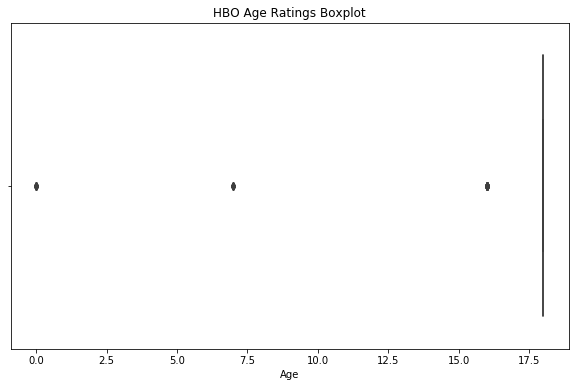

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["age"])
ax.set_title("HBO Age Ratings Boxplot")
ax.set_xlabel("Age");

Since most of the data is for 18 years or older, we will reduce the x axis.

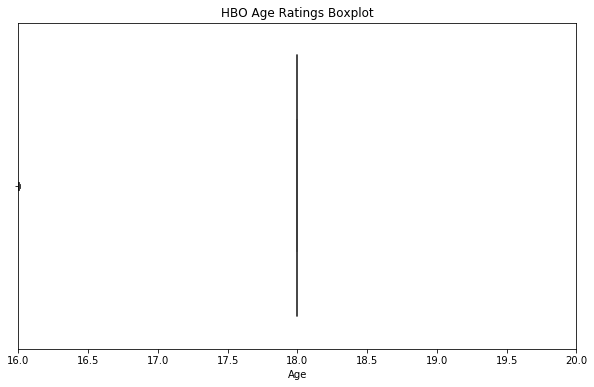

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["age"])
ax.set_title("HBO Age Ratings Boxplot")
ax.set_xlabel("Age")
ax.set_xlim(16,20);

As stated previously, most tv shows remain on 18 years or older.

In [28]:
hbo["audience"] = np.where(hbo["age"] <= 12, "Children", np.where(hbo["age"] < 18, "Teen", "Adult"))

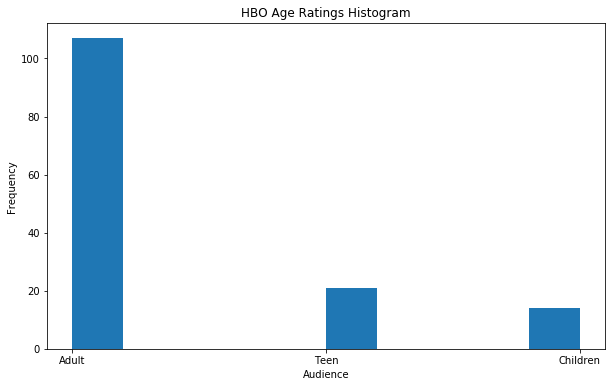

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hbo["audience"])
ax.set_title("HBO Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

In the histogram we can clearly see how the distribution is heavily skewed, having most values for adults and very few for teen and children, children being the lesser one.

-----

### 4. Comparison
#### i. Normalize data

In order to make a comparison, we must normalize the data for each streaming service.
We will do this by getting the ratio of frequency for each audience and the total number of tv shows.

**Netflix**

In [30]:
# group by audience using count as an aggregate function

netflix_age = (netflix.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

In [31]:
netflix_age["frequency"].sum()

1108

In [32]:
# create normalize column which divides frequency by the total tv shows

netflix_age["normalize"] = round(((netflix_age["frequency"] / netflix_age["frequency"].sum()) * 100), 2)

In [33]:
# add column to specify streaming service

netflix_age["streaming_service"] = "Netflix"

In [34]:
netflix_age

,audience,frequency,normalize,streaming_service
0,Adult,340,30.69,Netflix
1,Children,403,36.37,Netflix
2,Teen,365,32.94,Netflix


**Amazon**

In [35]:
amazon_age = (amazon.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

amazon_age["normalize"] = round(((amazon_age["frequency"] / amazon_age["frequency"].sum()) * 100), 2)

amazon_age["streaming_service"] = "Amazon"

In [36]:
amazon_age

,audience,frequency,normalize,streaming_service
0,Adult,162,23.82,Amazon
1,Children,332,48.82,Amazon
2,Teen,186,27.35,Amazon


**HBO**

In [37]:
hbo_age = (hbo.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

hbo_age["normalize"] = round(((hbo_age["frequency"] / hbo_age["frequency"].sum()) * 100), 2)

hbo_age["streaming_service"] = "HBO"

In [38]:
hbo_age

,audience,frequency,normalize,streaming_service
0,Adult,107,75.35,HBO
1,Children,14,9.86,HBO
2,Teen,21,14.79,HBO


#### ii. Combine data frames

In [39]:
age_ratings = netflix_age.append(amazon_age).append(hbo_age).reset_index(drop=True)

In [40]:
age_ratings

,audience,frequency,normalize,streaming_service
0,Adult,340,30.69,Netflix
1,Children,403,36.37,Netflix
2,Teen,365,32.94,Netflix
3,Adult,162,23.82,Amazon
4,Children,332,48.82,Amazon
5,Teen,186,27.35,Amazon
6,Adult,107,75.35,HBO
7,Children,14,9.86,HBO
8,Teen,21,14.79,HBO


#### ii. Plotting

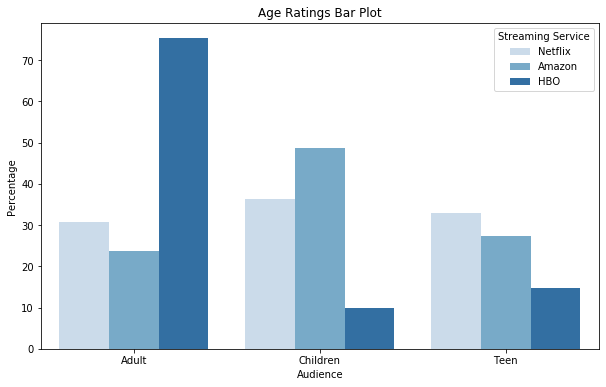

In [41]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=age_ratings["audience"]
            , y=age_ratings["normalize"]
            , hue=age_ratings["streaming_service"]
            , palette="Blues"
           , ci=None)

ax.set_xlabel("Audience")
ax.set_ylabel("Percentage")
ax.set_title("Age Ratings Bar Plot")

plt.legend(title="Streaming Service");

From the bar plot above, we can see that HBO has most tv shows for adults. Amazon and Netflix seem to have similar distributions, Netflix having more tv shows for teens and Amazon more tv shows for children.

In [42]:
# age_ratings.to_pickle("../Data/age_ratings.pkl")